# Final Tutorial - Global Terrorism Data Analysis
### Nick Shinn and Brian Lee

## Introduction

In this tutorial, you will apply data science to explore correlations that exist within global terrorism data, using the Global Terrorism Database maintained by the START consortium. We will first visualize the global data in various ways to form a better intuition on possible correlations that may exist. Using compiled features such as date and location, we will hypothesize what related factors may play a role in determining the likelihood of a terrorist attack and cross reference data outside the original dataset to test our hypotheses. (statistical Analysis blah blah)

We will be using mushroom data provided by UC Irvine to train our machine learning algorithms, and rely heavily on the python toolkit scikit-learn. The tutorial will walk through the process of creating decision trees and support vector machines for a binary classification given categorical features, which often makes analysis slightly more difficult.
While mushrooms are not often life-threatening or life-changing, these supervised learning algorithms are applicable to almost any classification problem. And, of course, this isn't to say that mushrooms aren't ever life-changing.

## Getting Started
Before you begin, you will need to install a few libraries. First, confirm you have the python package manager 'pip' installed on your computer. Installation instructions can be found online.

You may find the Global Terrorism Database at https://www.kaggle.com/START-UMD/gtd or access it directly through this git repository in the Datasets/Terrorism/ directory.

### Installing Packages
Before beginning you must install all required packages:
- numpy 
- matplotlib
- pandas
- folium
- seaborn
- sklearn
- statsmodels

If any are missing you may install them through your computer's shell or directly through this tutorial using the script below.

In [60]:
%%capture
import pip
def install(package):
   pip.main(['install', package])

install('numpy')
install('matplotlib')
install('pandas')
install('folium')
install('seabord')
install('sklearn')
install('statsmodels')

### Importing Packages
Now that we have the packages we need we can import and alias them for this tutorial

In [61]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import csv, folium
from datetime import datetime
from folium.plugins import HeatMapWithTime
%matplotlib inline

# I. Data Collection and Processing
## Cleaning
We want to pull in our global terrorism data as a pandas dataframe to begin

In [116]:
gtd_table = pd.read_csv("./Datasets/Terrorism/gtd10k.csv", encoding='latin1', low_memory=False)
gtd_table.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Selecting Desired Columns 
First let's display all the columns. This should help us select the ones we want based on the kind of data we're looking for.

In [117]:
print('Total Number of Columns - %d\n' % len(gtd_table.columns))
for col in gtd_table.columns:
    print(col)

Total Number of Columns - 136

Unnamed: 0
eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
wea

The ones we are interested in looking at are the ones containing time and location data. We'll save the eventid and attacktype1 along with the time/location columns in case we find a need for it later. Once we've selected our columns we'll rename them for readability.

In [118]:
column_names = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'provstate', 'city', 'latitude', 'longitude', 'attacktype1_txt']
gtd_table = gtd_table[column_names]
new_column_names = ['id', 'year', 'month', 'day', 'country', 'provstate', 'city', 'latitude', 'longitude', 'attacktype']
gtd_table.columns = new_column_names
gtd_table.describe()

,id,year,month,day,latitude,longitude
count,1.000000e+04,10000.000000,10000.000000,10000.000000,9694.000000,9694.000000
mean,1.976209e+11,1976.143900,6.315200,15.129700,33.066266,-21.027151
std,2.900603e+08,2.901523,3.477479,8.985808,22.047931,53.288740
min,1.970000e+11,1970.000000,0.000000,0.000000,-45.867889,-157.818968
25%,1.974098e+11,1974.000000,3.000000,7.000000,20.673343,-74.005941
50%,1.977073e+11,1977.000000,6.000000,15.000000,40.712784,-5.930109
75%,1.979021e+11,1979.000000,9.000000,23.000000,46.198392,11.119059
max,1.980013e+11,1980.000000,12.000000,31.000000,64.837778,172.636225


### Modifying Faulty Entries
Looking at the table above we see that there are entries where the month, day, or both are logged as 0. Upon inspection we see see that when either index is 0 it either indicates incomplete data on the attack or an attack that spanned multiple days. Since either can be unreliable for analyzing temporal data, we will drop any rows containing a 0 in either column.

In [119]:
gtd_table = gtd_table[gtd_table.month != 0]
gtd_table = gtd_table[gtd_table.day != 0]
gtd_table = gtd_table.reset_index(drop=True)

In [120]:
# Converting year, month, day columns to days of year
daysofyear = []
months = []
days = []
for index,row in gtd_table.iterrows():
    year = row['year']
    month = row['month']
    day = row['day']
    daysofyear.append(datetime(year,month,day).timetuple().tm_yday)
    months.append(month)
    days.append(day)
gtd_table['dayofyear'] = pd.Series(daysofyear)
gtd_table['month'] = pd.Series(months)
gtd_table['day'] = pd.Series(days)

In [121]:
gtd_table['date'] = gtd_table.apply(lambda row: '%d-%02d' %(row.year, row.month), axis=1)
gtd_table.head()

,id,year,month,day,country,provstate,city,latitude,longitude,attacktype,dayofyear,date
0,197000000001,1970,7,2,Dominican Republic,NaN,Santo Domingo,18.456792,-69.951164,Assassination,183,1970-07
1,197001010002,1970,1,1,United States,Illinois,Cairo,37.005105,-89.176269,Armed Assault,1,1970-01
2,197001020001,1970,1,2,Uruguay,Montevideo,Montevideo,-34.891151,-56.187214,Assassination,2,1970-01
3,197001020002,1970,1,2,United States,California,Oakland,37.805065,-122.273024,Bombing/Explosion,2,1970-01
4,197001020003,1970,1,2,United States,Wisconsin,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,2,1970-01


# II. Exploratory Data Analysis and Visualization

## Temporal Data

### Chronological Counts by Month

In [187]:
table_by_month = gtd_table[['date','id']].groupby(['date']).count()
table_by_month = table_by_month.rename(index=str, columns={'id':'count'})
table_by_month = table_by_month.reset_index()
table_by_month.head()

,date,count
0,1970-01,36
1,1970-02,55
2,1970-03,68
3,1970-04,78
4,1970-05,70


In [188]:
yearmax = gtd_table['year'].max()
yearmin = gtd_table['year'].min()
numyears = yearmax - yearmin + 1
year_labels = range(yearmin, yearmax+1)
year_ticks = [12*i for i in range(numyears)]

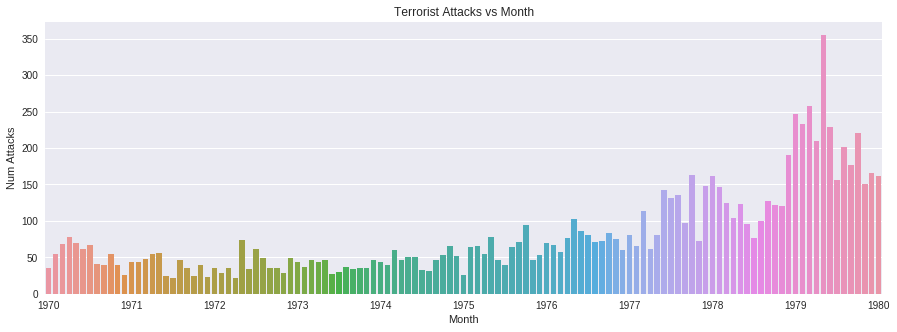

In [189]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='date',y='count',data=table_by_month)
plt.title('Terrorist Attacks vs Month')
plt.ylabel('Num Attacks')
plt.xlabel('Month')
plt.xticks(year_ticks);
ax.set_xticklabels(year_labels);

### Counts by Day of the Year

In [192]:
table_by_date = gtd_table[['dayofyear','id']].groupby(['dayofyear']).count()
table_by_date = table_by_date.rename(index=str, columns={'id':'count'})
table_by_date = table_by_date.reset_index()
table_by_date.head()

,dayofyear,count
0,1,33
1,2,24
2,3,38
3,4,40
4,5,22


In [193]:
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
month_ticks = []
for i in range(12):
    tick_locs.append(datetime(2000,i+1,1).timetuple().tm_yday)

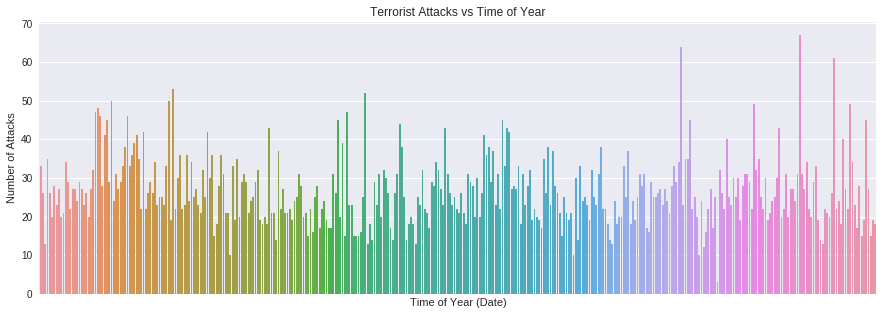

In [194]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='dayofyear',y='count',data=table_by_date);
plt.title('Terrorist Attacks vs Time of Year')
plt.ylabel('Number of Attacks')
plt.xlabel('Time of Year (Date)')
plt.xticks(month_ticks);
ax.set_xticklabels(month_labels);

## Stratifying by Spatial Data

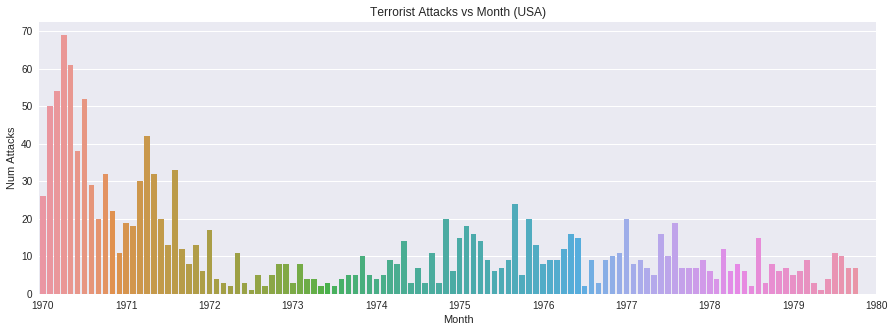

In [195]:
table_usa = gtd_table.loc[gtd_table['country'] == 'United States']
table_by_month = table_usa[['date','id']].groupby(['date']).count()
table_by_month = table_by_month.rename(index=str, columns={'id':'count'})
table_by_month = table_by_month.reset_index()

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='date',y='count',data=table_by_month)
plt.title('Terrorist Attacks vs Month (USA)')
plt.ylabel('Num Attacks')
plt.xlabel('Month')
plt.xticks(year_ticks);
ax.set_xticklabels(year_labels);

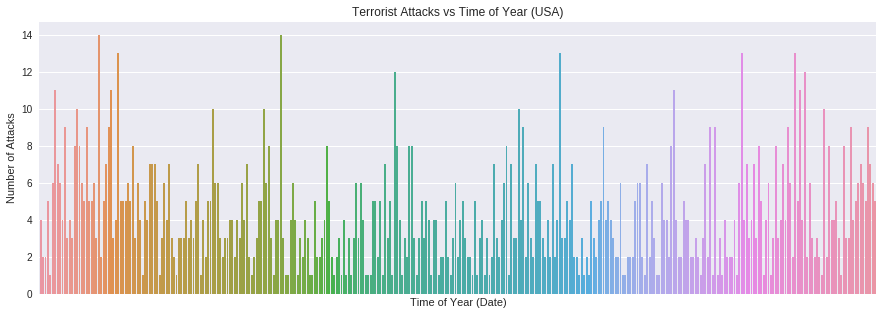

In [197]:
table_by_date = table_usa[['dayofyear','id']].groupby(['dayofyear']).count()
table_by_date = table_by_date.rename(index=str, columns={'id':'count'})
table_by_date = table_by_date.reset_index()
table_by_date.head()

#plot the data
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='dayofyear',y='count',data=table_by_date);
plt.title('Terrorist Attacks vs Time of Year (USA)')
plt.ylabel('Number of Attacks')
plt.xlabel('Time of Year (Date)')
plt.xticks(month_ticks);
ax.set_xticklabels(month_labels);

In [100]:
# Plot by month
df_ny = df_usa.loc[df_usa['provstate'] == 'California']
sns.jointplot(x="dayofyear", y="latitude", data=df_ny)

NameError: name 'df_usa' is not defined

In [ ]:
# Plot by month
df_nyc = df_ny.loc[df_ny['city'] == 'Los Angeles']
sns.jointplot(x="dayofyear", y="latitude", data=df_nyc)

# III. Analysis and Machine Learning

# IV. Insight and Conclusion